#Informasi singkat
Nama : Rizka Aji GG

Batch : 01

#Dataset
Dataset yang menjadi rujukan adalah dataset yang berisikan informasi berkaitan dengan kickstart project dimana terdapat beberapa kategori, besaran uang yang dibutuhkan, kapan waktu awal dan akhir penggalangan dibuat, serta kejelasan status yang didapat.

#Objectives



*   Mampu memuat melakukan analisis sederhana
*   Mampu menghitung central tendency,korelasi, dan covarian
*   Mampu melakukan perhitungan dengan beberapa pengujian 
*   Mampu membuat membuat Hipotesis








#Import Library 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

#Data Preprocess

loading data set project 2018

In [5]:
df_raw = pd.read_csv('/content/ks-projects-201801.csv',error_bad_lines=False)
print(df_raw.shape)
df_raw

(204758, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.00,1283.00,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204753,2043098161,Navas Lab 2 — Bamboo Hoody,Apparel,Fashion,CAD,2017-10-15,12000.0,2017-09-12 13:53:01,14497.0,successful,107,CA,271.72,11603.17,9604.61
204754,2043105264,PortFringe 2012,Theater,Theater,USD,2012-03-24,2012.0,2012-02-25 04:04:28,2566.0,successful,52,US,2566.00,2566.00,2012.00
204755,2043109535,TREK across America,Places,Photography,USD,2017-04-07,6500.0,2017-02-27 00:21:42,8550.0,successful,88,US,1780.00,8550.00,6500.00
204756,2043110856,You Could Own a Chicken Painting!,Painting,Art,USD,2013-10-01,500.0,2013-09-09 22:29:41,3148.0,successful,64,US,3148.00,3148.00,500.00


Menunjukan informasi mengenai jenis data yang ada

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204758 entries, 0 to 204757
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                204758 non-null  int64  
 1   name              204757 non-null  object 
 2   category          204758 non-null  object 
 3   main_category     204758 non-null  object 
 4   currency          204758 non-null  object 
 5   deadline          204758 non-null  object 
 6   goal              204758 non-null  float64
 7   launched          204758 non-null  object 
 8   pledged           204758 non-null  float64
 9   state             204758 non-null  object 
 10  backers           204758 non-null  int64  
 11  country           204758 non-null  object 
 12  usd pledged       202721 non-null  float64
 13  usd_pledged_real  204758 non-null  float64
 14  usd_goal_real     204757 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 23.4+ MB


Menampilkan histogram berdasarkan USD pledged real yang merupakan objek pengamatan

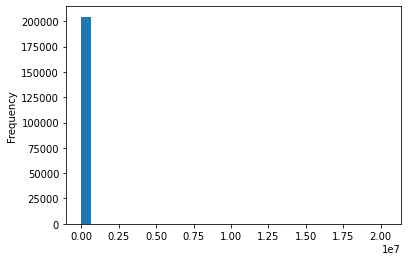

In [7]:
df_raw['usd_pledged_real'].plot.hist(bins=30, density=False)

#Filtering

melakukan filtering untuk memperjelas objek yang diamati

In [8]:
df_filt = df_raw[df_raw['usd_pledged_real']<=50000]

histogram hasil filtering dengan nilai dibaha sama dengan 50000

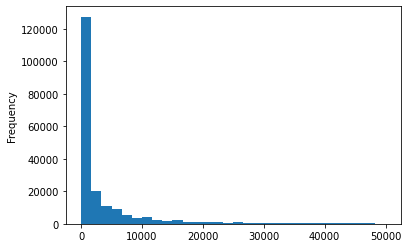

In [9]:
df_filt['usd_pledged_real'].plot.hist(bins=30, density=False)

Melakukan pengamatan lain dengan objek Main Category

In [10]:
df_filt.groupby('main_category').count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,15081,15081,15081,15081,15081,15081,15081,15081,15081,15081,15081,15081,15081,15081
Comics,5737,5737,5737,5737,5737,5737,5737,5737,5737,5737,5737,5737,5737,5737
Crafts,4805,4805,4805,4805,4805,4805,4805,4805,4805,4805,4805,4805,4805,4805
Dance,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058,2057,2058,2058
Design,15016,15016,15016,15016,15016,15016,15016,15016,15016,15016,15016,15015,15016,15016
Fashion,11956,11956,11956,11956,11956,11956,11956,11956,11956,11956,11956,11954,11956,11955
Film & Video,33842,33841,33842,33842,33842,33842,33842,33842,33842,33842,33842,33363,33842,33842
Food,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13165,13164,13165,13165
Games,17861,17861,17861,17861,17861,17861,17861,17861,17861,17861,17861,17858,17861,17861


Melakukan grouping dengan main category dengan melakukan perhitungan kumulatif sum untuk mengetahui masih bisa digunakan atau tidak sebagai objek dengan perhitungan nilai kumulatif mendekati nilai kritikal 95% atau 0.95

In [11]:
df_grp_MC = df_filt.groupby('main_category').count().reset_index()[['main_category','usd_pledged_real']].sort_values('usd_pledged_real',ascending=False)
df_grp_MC['MC_count']=df_grp_MC['usd_pledged_real'].cumsum()
df_grp_MC['csum']=df_grp_MC['MC_count']/df_grp_MC['MC_count'].max()
df_grp_MC = df_grp_MC[df_grp_MC['csum']<=0.95]

Tampilan tabel didasari perhitungan dan grouping sebelumnya

In [12]:
print(df_grp_MC.shape)
df_grp_MC

(11, 4)


,main_category,usd_pledged_real,MC_count,csum
6,Film & Video,33842,33842,0.170020
10,Music,27833,61675,0.309851
12,Publishing,21463,83138,0.417680
8,Games,17861,100999,0.507413
13,Technology,16148,117147,0.588539
0,Art,15081,132228,0.664305
4,Design,15016,147244,0.739745
7,Food,13165,160409,0.805885
5,Fashion,11956,172365,0.865951
14,Theater,5800,178165,0.895090


Memasukan hasil grouping pada tabel filter sebelumnya

In [13]:
df_filt = df_filt[df_filt['main_category'].isin(df_grp_MC['main_category'])]

jumlah ror dan table setelah grouping

In [14]:
df_filt.shape

(183912, 15)

#Central Tendency

Mencari central tendency dengan hasil rata rata 3610.892204 dan standar deviasi 7163.116874 

Melakukan perhitungan secara manual atau menggunakan funngsi .describe() untuk mendapatkan semua nilai yand central of tendency tetapi tidak termasuk modus

In [43]:
print('Median: '+ str(df_filt['usd_pledged_real'].median()))
print('Modus: '+ str(df_filt['usd_pledged_real'].mode()[0]))
print('Mean: '+ str(df_filt['usd_pledged_real'].mean()))
print('Standard Deviation: '+ str(df_filt['usd_pledged_real'].std()))

Median: 560.085
Modus: 0.0
Mean: 3620.186420244482
Standard Deviation: 7166.827921175776


In [40]:
print(df_filt['usd_pledged_real'].describe())

count    183912.000000
mean       3620.186420
std        7166.827921
min           0.000000
25%          28.117500
50%         560.085000
75%        3579.195000
max       50000.000000
Name: usd_pledged_real, dtype: float64


Garis bantu pengamatan pada objek USD pledged real yang dapat dilihat bahwa nilai mean lebih besar dibandingkan dengan nilai median sehingga skewness mengarah kekiri sejalan dengan mean.



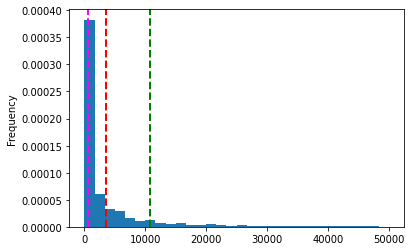

In [41]:
df_filt['usd_pledged_real'].plot.hist(bins=30,density=True)
plt.axvline(df_filt['usd_pledged_real'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd_pledged_real'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd_pledged_real'].describe()['mean']+df_filt['usd_pledged_real'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)

# Chi Square Test

Melakukan perhitungan Chi Square Test dengan masih menggunakan main category sebagai objek dan state yang dipilih untuk menunjukan hubungan

In [17]:
df_pivot=df_filt.groupby(['main_category','state']).count()[['goal','usd_pledged_real']].reset_index()

In [18]:
df_pivot

,main_category,state,goal,usd_pledged_real
0,Art,canceled,1250,1250
1,Art,failed,7576,7576
2,Art,live,104,104
3,Art,successful,6096,6096
4,Art,suspended,55,55
...,...,...,...,...
59,Theater,failed,1992,1992
60,Theater,live,26,26
61,Theater,successful,3430,3430
62,Theater,suspended,12,12


Menjadikan main categori sebagai index dan state sebagai column untuk melihat nilai yang tertera pada column yang ada

In [19]:
df_pivot = df_pivot.pivot(index="main_category",columns="state", values='usd_pledged_real').fillna(0)

In [20]:
df_pivot

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,1250.0,7576.0,104.0,6096.0,55.0,0.0
Design,2218.0,7963.0,164.0,4538.0,132.0,1.0
Fashion,1414.0,7594.0,131.0,2742.0,73.0,2.0
Film & Video,3148.0,17806.0,187.0,12180.0,57.0,464.0
Food,1184.0,8683.0,89.0,3130.0,79.0,0.0
Games,3285.0,8647.0,151.0,5666.0,111.0,1.0
Music,1790.0,11670.0,152.0,12939.0,79.0,1203.0
Photography,534.0,3427.0,28.0,1730.0,27.0,1.0
Publishing,1963.0,12495.0,168.0,6569.0,33.0,235.0


perhitungan chisquare dan p value dari objek diatas diman didapatkan bahwa tidak ada hubungan antara state dan main category sehingga H0 diterima karena nilai p value sama dengan 0

In [21]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 15040.71
p-value: 0.0000


#Correlation dan Variance

Melihat korelasi tiap objek yang ada

In [22]:
df_filt.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.004245,-0.001528,-0.003235,-0.006669,-0.004852,0.004156
goal,0.004245,1.000000,0.012318,-0.009498,-0.005866,-0.006420,0.911722
pledged,-0.001528,0.012318,1.000000,0.478787,0.560691,0.656920,-0.003981
backers,-0.003235,-0.009498,0.478787,1.000000,0.663919,0.735554,-0.008719
usd pledged,-0.006669,-0.005866,0.560691,0.663919,1.000000,0.897171,-0.004464
usd_pledged_real,-0.004852,-0.006420,0.656920,0.735554,0.897171,1.000000,-0.005424
usd_goal_real,0.004156,0.911722,-0.003981,-0.008719,-0.004464,-0.005424,1.000000


melakukan ploting scater untuk meilhat hubungan secara jelas dimana disi diambil usd pledge real dan goal sebagai objek

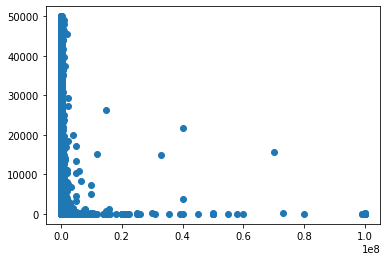

In [23]:
plt.scatter(df_filt['goal'],df_filt['usd_pledged_real'])

plot diatas menunjukan bahwa terdapat hubungan negatif antara kedua objek yang dipilih

In [24]:
df_filt['usd_pledged_real'].var()

51363422.451744705

Nilai covarian yang didapatkan dari objek usd pledge real

#Two sample test

Melaukan Two sample test didasari hubungan main category dengan usd pledge real

In [25]:
df_MC=df_filt.groupby('main_category').agg({'usd_pledged_real':['count','mean']}).reset_index()
df_MC.columns = df_MC.columns.droplevel()

In [26]:
df_MC.sort_values('count',ascending=False).head(5)

,,count,mean
3,Film & Video,33842,3811.017832
6,Music,27833,3289.394303
8,Publishing,21463,2507.449647
5,Games,17861,5133.575016
9,Technology,16148,3722.464419


Mengambil sampel pada main category untuk usd pledge real dengan objek film dan video serta games

In [27]:
df_FV = df_filt[df_filt['main_category']=='Film & Video']
df_Gem = df_filt[df_filt['main_category']=='Games']

Plot kedua objek yang dipilih sebelumnya

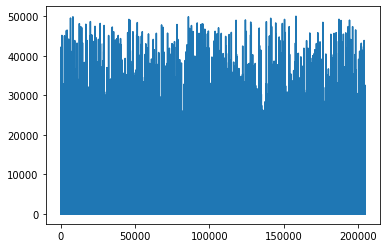

In [28]:
df_FV['usd_pledged_real'].plot()


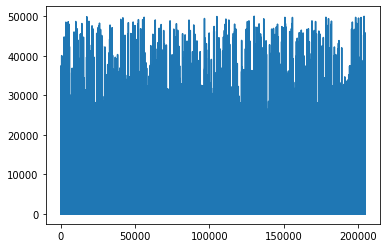

In [29]:
df_Gem['usd_pledged_real'].plot()

Melakukan perhitungan sederhana dengan mencari nilai yang diperlukan dimana dicari STD, mean, kurtosis, Tstatistic dan pvalue

Film & Video sample mean:3811.0178322794072
Film & Video sample std:7229.879780654792
Film & Video Kurtosis:10.646061420064912
Games sample mean:5133.575015956553
t-statistic:16.95153751652071
p-value:0.000000


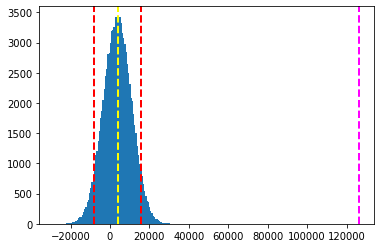

In [30]:
np.random.seed(123)
nonMath =df_FV['usd_pledged_real']
math = df_Gem['usd_pledged_real']
print("Film & Video sample mean:" + str(nonMath.mean()))
print("Film & Video sample std:" + str(nonMath.std()))
print("Film & Video Kurtosis:" + str(nonMath.kurtosis()))
print("Games sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Kesimpulan
H0 = 0
H1 != 0,

hipotesis testing degan objek utama usd pledge real dan melihat keterkaitan dengan main category dimana dilakukan chi square test dan two sample test didapatkan bahwa keduanya tidak meiliki hubungan. Hal ini dapat dilihat dengan nilai p-value yang sama dengan 0 dimana critical value adalah sebesar 0.05 dengan demikian maka H0 diterima dan H1 ditolak. Selain itu kita dapat melihat nilai kurtosis dimana menunjukan keruncingan kurva yang terbentuk yang mana curva diatas berbentuk runcing yang menunjukan distribusi yang tidak merata. 